In [3]:
import torch
import torchvision


In [13]:

train_dir = "./ADNI/AD_NC/train"
test_dir = "./ADNI/AD_NC/test"


train_data = torchvision.datasets.ImageFolder(root= train_dir)
test_data = torchvision.datasets.ImageFolder(root= test_dir)

In [15]:
print(len(train_data), train_data.class_to_idx, train_data.classes)
print(len(test_data), test_data.class_to_idx, test_data.classes)

21520 {'AD': 0, 'NC': 1} ['AD', 'NC']
9000 {'AD': 0, 'NC': 1} ['AD', 'NC']


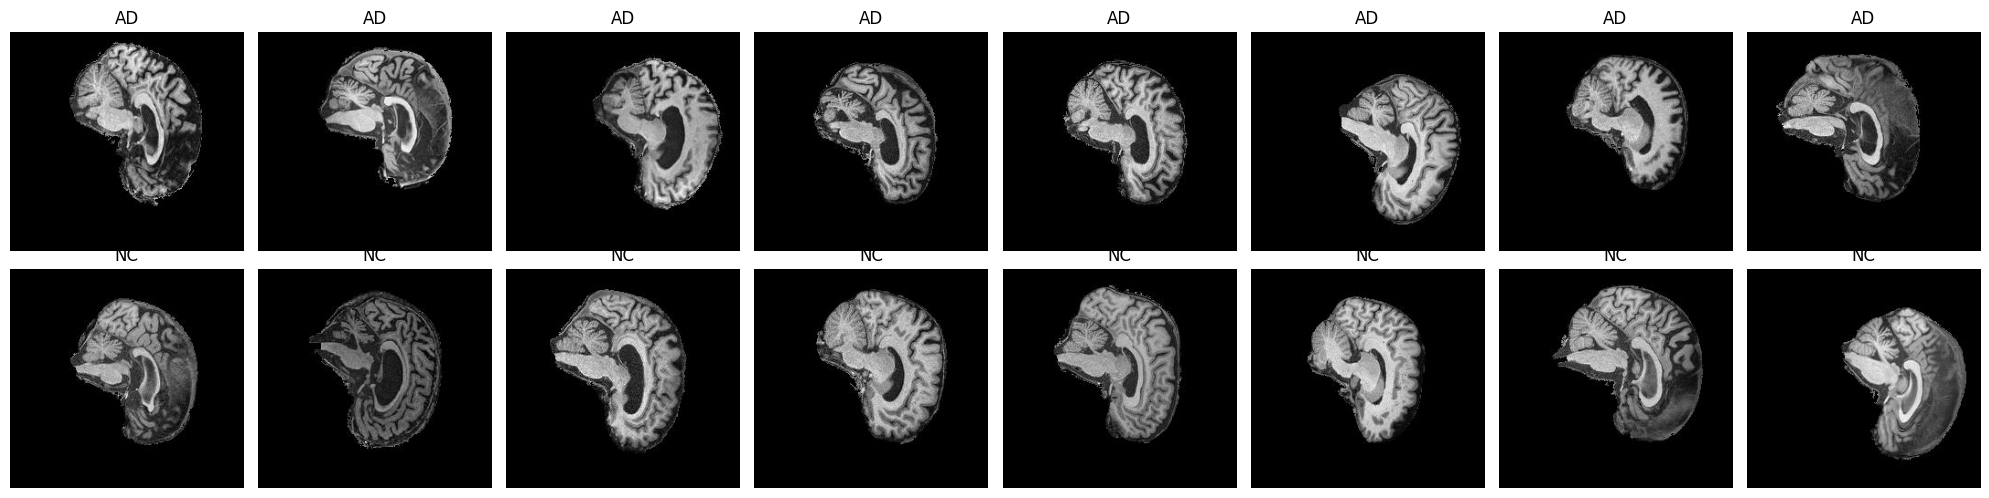

In [16]:
import matplotlib.pyplot as plt
import random

# Shuffle the dataset
indices = list(range(len(train_data)))
random.shuffle(indices)

# Set up to display 8 images per class
num_images = 8
ad_images = []
nc_images = []

# Randomly collect 8 images for each class (AD = 0, NC = 1)
for idx in indices:
    image, label = train_data[idx]
    if label == 0 and len(ad_images) < num_images:  # Class 0 (AD)
        ad_images.append(image)
    elif label == 1 and len(nc_images) < num_images:  # Class 1 (NC)
        nc_images.append(image)
    if len(ad_images) >= num_images and len(nc_images) >= num_images:
        break

# Plotting AD class (0)
fig, axs = plt.subplots(2, num_images, figsize=(20, 5))

for i in range(num_images):
    # AD class (top row)
    axs[0, i].imshow(ad_images[i])
    axs[0, i].set_title('AD')
    axs[0, i].axis('off')

    # NC class (bottom row)
    axs[1, i].imshow(nc_images[i])
    axs[1, i].set_title('NC')
    axs[1, i].axis('off')

plt.tight_layout()
plt.show()


#### Data augmentation stuff
- We notice that, the brain is not always center image so naively doing crops and centering could be quite dangerous!!

This leads me to want to do padding instead of cropping to bump it up to 250x250.
Also, let's do data augmentation to increase generalisation;
- rotation
- flipping, etc..

In [ ]:
from torch.utils.data import DataLoader

train_dir = "./ADNI/AD_NC/train"
test_dir = "./ADNI/AD_NC/test"


# Redo the loading thing just because my shuffling to generate the pics above may have done unwanted changes, and it takes barely any
train_data = torchvision.datasets.ImageFolder(root= train_dir)
test_data = torchvision.datasets.ImageFolder(root= test_dir) 
# Define batch size
batch_size = 32  # You can adjust this based on your GPU memory
num_workers = 4

# Creating the DataLoaders
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=num_workers)

# Shuffle not needed for test because we aren't training on it. Shuffle is mainly used because, imagine if you had all your 0 classifications in the beginning and the dataloader ate this. You're feeding the NN hundreds of entire "0s" that it's going to backprop in this direction, instead of an 'unbiased sample'. This can affect how well it learns. Shuffling helps better convergence, and generalisation.

test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=num_workers)
